# Lightning Network (LN) - Exploratory data analysis and cleansing

## Loading libraries and mounting drive

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import networkx as nx
import itertools
import matplotlib.pyplot as plt
import time

## Loading data

In [2]:
# Create your connection.
cnx = sqlite3.connect('/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/MIMS_capstone/Data/LN_channels.db')
df = pd.read_sql_query("SELECT * FROM channels", cnx)
df.to_csv(r'/Users/dsrincon/Dropbox/Personal/EDU/Posgrado/masters_usa/MIMS/research/MIMS_capstone/Data/LN_channels.csv')

In [3]:
df.head()

,short_channel_id,open_block,open_transaction,address,close_block,close_transaction,node0,node1,satoshis,last_seen,open_time,open_fee,close_time,close_fee,last_update,close_type,close_htlc_count,close_balance_a,close_balance_b
0,505149x622x0,505149,f6bc767df9148ebf76d2b9baf4eb46e3230712c2bf5a51...,bc1qjmg6ev344fenh3zhg0yjl6hyvxpxluw6x9nn2a5lv4...,592638.0,82cb2ea2a06c8c453d8b9ca08e17bbefe87225aa380b2d...,0250373555232cec757ea141273e75381c84cc3ab22f1e...,02ef61a252f9504a42fc264a28476f44cea0711a44b2da...,300000,2019-08-22 02:49:00,1516441417,40748,1.567276e+09,184.0,1.563172e+09,mutual,0.0,3570.0,296246.0
1,513675x2245x0,513675,4297b5fe9beeb701c67fd0f84861b22edbcafe5c25be67...,bc1qymmdt0vzhdjqyqw2cevrqppp6rrlg5j2l20yk72z6y...,594718.0,3f86d9427c750f37a963b5a329da8941520f5a6cdbfe02...,028aa5a991a2acf33da91674fe062219b640e5e57d77a4...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,50000,2019-10-07 02:42:58,1521144238,306,1.568401e+09,4410.0,1.552879e+09,unused,0.0,45590.0,0.0
2,513887x1177x0,513887,3b4cc434e62c1739e79171c7c1641bf9ac0e32d8530c68...,bc1q48l3h7sfdjaqat3sy98naltkwlujwefwnkfqxfm8fd...,NaN,None,02d97e94cfeedca2a3da47acb400bc6836e671b3cb3fc0...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,50000,2020-02-14 03:15:22,1521262476,442,NaN,NaN,1.581536e+09,None,NaN,NaN,NaN
3,513909x1248x0,513909,86311514680351b1e644276efd7704ba13be169cc1a272...,bc1q24kvd9wdjdhwgr54fmu7cu9xldmsjuwdsq2ph5fwnj...,NaN,None,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,20000,2020-02-14 03:15:26,1521271023,306,NaN,NaN,1.581464e+09,None,NaN,NaN,NaN
4,513910x1814x1,513910,7f010765ce336d2be78c846844544e6a06ce2c59e7785f...,bc1qzh9xrpqvyse7fuanc8tl5e75qymq5fzk3deh78hs02...,NaN,None,02ad6fb8d693dc1e4569bcedefadf5f72a931ae027dc0f...,03fab7f8655169ea77d9691d4bd359e97782cb6177a6f7...,20000,2020-02-14 03:15:26,1521272338,153,NaN,NaN,1.581466e+09,None,NaN,NaN,NaN


In [4]:
df.describe()

,open_block,close_block,satoshis,open_time,open_fee,close_time,close_fee,last_update,close_htlc_count,close_balance_a,close_balance_b
count,72476.000000,38355.000000,7.247600e+04,7.247600e+04,72476.000000,3.835500e+04,38355.000000,5.552000e+04,36822.000000,3.682200e+04,3.682200e+04
mean,579183.075335,595606.637622,2.668396e+06,1.559505e+09,5514.790703,1.569033e+09,6479.540712,1.577627e+09,0.030199,1.554857e+06,6.759577e+05
std,21053.963141,11761.861535,5.473030e+06,1.226237e+07,10789.996329,6.794199e+06,7392.241919,5.578798e+06,0.389022,3.312313e+06,2.720192e+06
min,505149.000000,535029.000000,1.050000e+03,1.516441e+09,122.000000,1.533314e+09,36.000000,1.524248e+09,0.000000,0.000000e+00,0.000000e+00
25%,565486.500000,585438.000000,1.500000e+05,1.551621e+09,458.000000,1.563151e+09,1760.000000,1.574088e+09,0.000000,5.300775e+04,0.000000e+00
50%,575981.000000,594220.000000,5.778270e+05,1.557823e+09,2652.000000,1.568142e+09,3647.000000,1.581101e+09,0.000000,2.356620e+05,0.000000e+00
75%,595671.250000,605251.500000,2.600000e+06,1.568933e+09,6260.000000,1.574627e+09,9102.500000,1.581447e+09,0.000000,9.978100e+05,5.559375e+04
max,617297.000000,617298.000000,2.684355e+08,1.581648e+09,663000.000000,1.581649e+09,201395.000000,1.581650e+09,51.000000,1.309727e+08,1.669281e+08


## General descriptive data

In [5]:
# Range covered by Data

# Calculate block range
start_block=min(df['open_block'])
end_block=max(df['close_block'])

# Calculate date range
start_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(min(df['open_time'])))
end_time=time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(max([max(df['close_time']),max(df['open_time'])])))


print('Data from beggining of LN creation  {} (block: {}) to {} (block: {})'.format(start_time,start_block,end_time,int(end_block)))


Data from beggining of LN creation  2018-01-20 01:43:37 (block: 505149) to 2020-02-13 19:00:19 (block: 617298)


In [4]:
# TODO: Add Eva's general descriptive analysis here

## Block-per-Block network activity

In [7]:
# Blocks with activity

open_blocks=set(df['open_block'])
close_blocks=set(np.nan_to_num(df['close_block'].to_numpy()))
active_blocks=open_blocks.union(close_blocks)

print('Total blocks that have been mined in the analysis period: {}'.format(int(end_block)-start_block))
print('Number of blocks where channels have been opened: {}'.format(len(open_blocks)))
print('Number of blocks where channels have been closed: {}'.format(len(close_blocks)))
print('Total blocks with activity (opening or closing of channels): {}'.format(len(active_blocks)))



Total blocks that have been mined in the analysis period: 112149
Number of blocks where channels have been opened: 30543
Number of blocks where channels have been closed: 11024
Total blocks with activity (opening or closing of channels): 36544


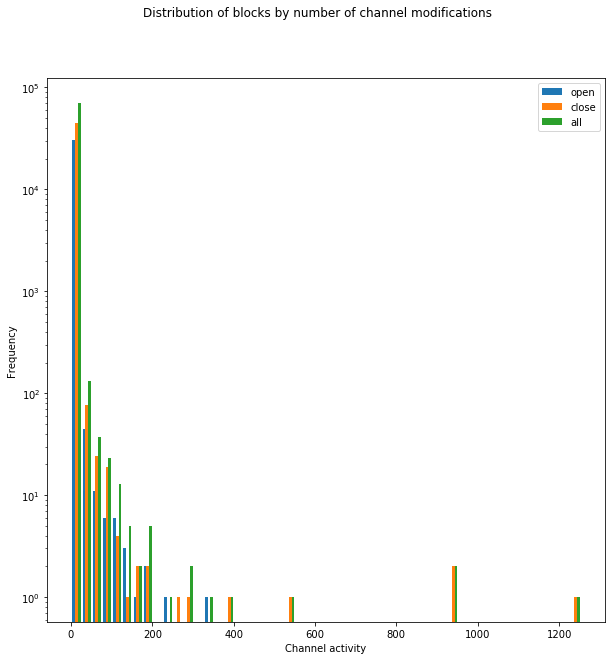

In [176]:
# Distribution of Block activity
ob_values, ob_counts = np.unique(np.array(list(df['open_block'])), return_counts=True)
cb_values, cb_counts = np.unique(np.array(list(df['close_block'])), return_counts=True)
ab_values, ab_counts = np.unique(np.array(list(df['open_block'])+list(df['close_block'])), return_counts=True)


fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Distribution of blocks by activity')
plt.yscale('log', nonposy='clip')
plt.xlabel('Channel activity')
plt.ylabel('log(Frequency)')
_=plt.hist([ob_counts,cb_counts,ab_counts],bins=50,label=['channel openings','channel closures','channel openings and closures'])
plt.legend(loc='upper right')

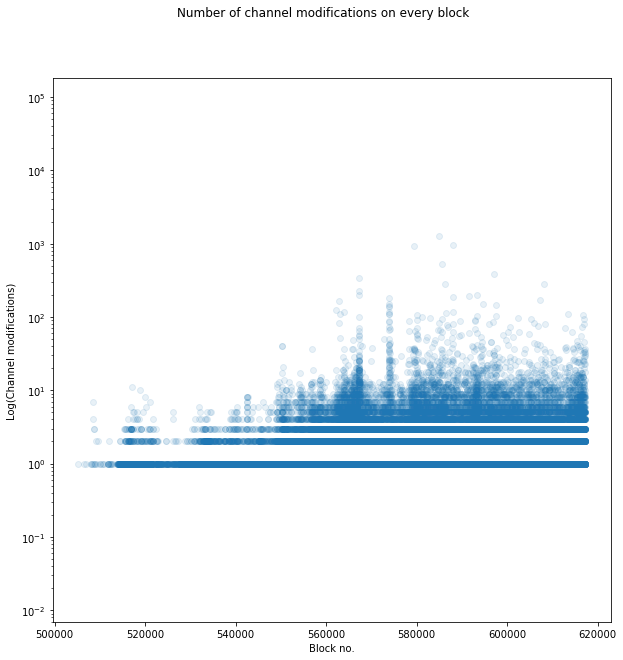

In [177]:
# Number of link opening or closings per block (log scale)
fig,ax=plt.subplots(figsize=(10,10))
fig.suptitle('Total channel activity (openings or closures) per block')
plt.yscale('log', nonposy='clip')
plt.xlabel('Block no.')
plt.ylabel('Log(No. channels opened or closed)')
_=plt.scatter(ab_values,ab_counts,alpha=0.1)

In [ ]:
# TODO: Net capacity change per block

In [ ]:
# TODO: Nodes making changes per block

In [ ]:
# TODO: Opening and Closing fees (and averages) per block

In [ ]:
# TODO: Analysis of outliers (Blocks with activity > 200)

## Redundancy (PEND) 

In [ ]:
#----MIGHT NOT BE NECESSARY----
# The df_open needs to be defined and or the analysis for redundancy on every snapshot. (How to deal with redundancy)
# Redundant one way channels
edges_zip_1=zip(df_open['node0'],df_open['node1'])
edge_prod=[a+b for a,b in edges_zip_1]

values, counts = np.unique(edge_prod, return_counts=True)

#plt.hist(counts,bins=[0, 1, 2, 3, 4, 5, 6,7,8,9,10])

edges_redun=counts[np.where(counts>1)]

print(len(edges_redun))
plt.yscale('log', nonposy='clip')
_=plt.hist(edges_redun,bins=max(counts))

In [ ]:
# Redundant bi-directional channels

# Hashing node id's and multiply them together to have the same channel representation in both directions 
edge_hash_0=np.array([hash(a) for a in df_open['node0']])
edge_hash_1=np.array([hash(a) for a in df_open['node1']])
edge_hash=np.multiply(edge_hash_0,edge_hash_1) # There is overflow in this multiplication but it doesn't matter for the purpose of comparisson

# Count
values, counts = np.unique(edge_hash, return_counts=True)
edges_redun_h=counts[np.where(counts>1)]
print(len(edges_redun_h))